In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_MAE_MSE(MAE_File, MSE_File, title_mae = 'MAE every 5th Epoch', title_mse = 'MSE every 5th Epoch'):
    MAE_HR = np.genfromtxt(MAE_File, delimiter=',')
    MSE_HR = np.genfromtxt(MSE_File, delimiter=',')

    f = plt.figure(figsize=(15,4))
    ax1 = f.add_subplot(121)
    ax2 = f.add_subplot(122)

    ax1.plot(MAE_HR)
    ax1.set_title(title_mae)
    ax1.set_ylabel('MAE')
    ax1.set_xlabel('Epoch')

    ax2.plot(MSE_HR)
    ax2.set_title(title_mse)
    ax2.set_ylabel('MSE')
    ax2.set_xlabel('Epoch')

In [3]:
def plot_loss(N_Loss_File, G_Loss_File):
    N_Loss = np.genfromtxt(N_Loss_File, delimiter=',')
    G_Loss = np.genfromtxt(G_Loss_File, delimiter=',')
    
    f = plt.figure(figsize=(15,4))
    ax1 = f.add_subplot(121)
    ax2 = f.add_subplot(122)

    ax1.plot(N_Loss)
    ax1.set_title('Icc Loss')
    ax1.set_ylabel('Icc Loss')
    ax1.set_xlabel('Epoch')

    ax2.plot(G_Loss)
    ax2.set_title('Generator Loss')
    ax2.set_ylabel('SRGAN Generator Loss')
    ax2.set_xlabel('Epoch')

### Training ICC Single branch and SRGAN pipeline

Epochs - 1000

W = 0.1

alpha = 2 (downsampling factor)

Generator Loss Function = <b>W</b> \* (image_loss + 0.001 \* adversarial_loss + 0.006 \* perception_loss) + density_loss

Best Results

MAE_HR: 85.0 MSE_HR: 140.4 Epoch: 920

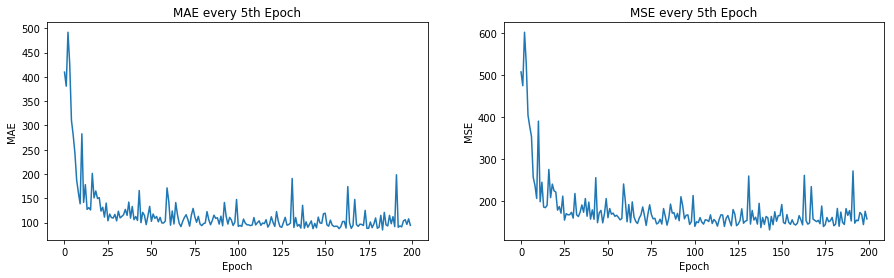

In [4]:
plot_MAE_MSE('MAE_Trial_1.csv', 'MSE_Trial_1.csv')

W = 0.01

Best Results

MAE_HR: 81.0 MSE_HR: 129.8 Epoch: 630

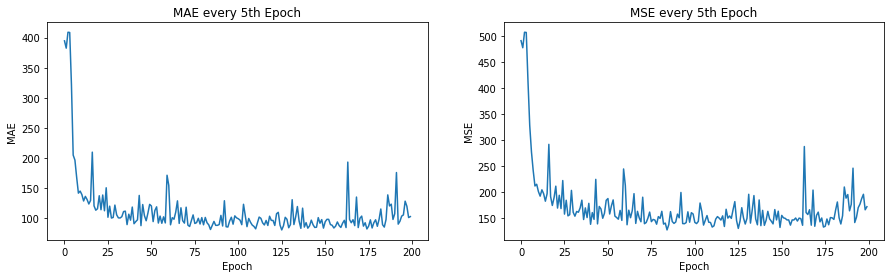

In [5]:
plot_MAE_MSE('MAE_Trial_2.csv', 'MSE_Trial_2.csv')

W = 0.001

Best Results

MAE_HR: 84.0 MSE_HR: 133.6 Epoch: 555

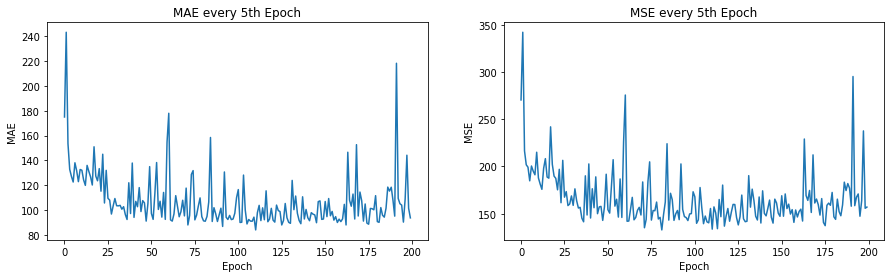

In [6]:
plot_MAE_MSE('MAE_Trial_3.csv', 'MSE_Trial_3.csv')

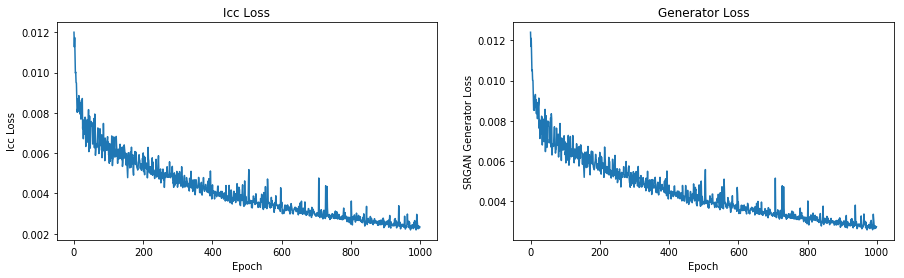

In [7]:
plot_loss('N_Loss_Trial_3.csv', 'G_Loss_Trial_3.csv')

### Training ICC Single branch for colored images (Baseline)

Epochs - 1500

Best Results

MAE_HR: 77.0 MSE_HR: 133.7 Epoch: 945

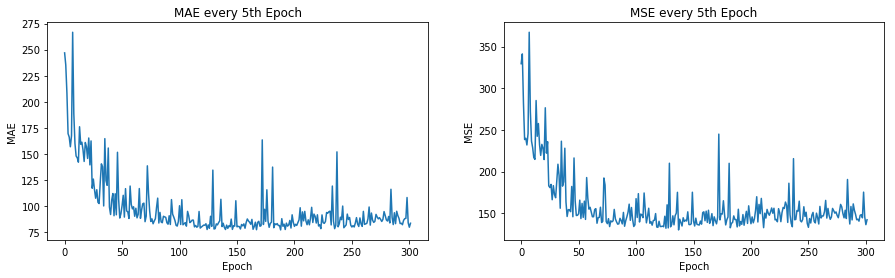

In [8]:
plot_MAE_MSE('MAE_Trial_5.csv', 'MSE_Trial_5.csv')

### Training ICC Single branch and SRGAN pipeline for colored images

Epochs - 400/1000

W = 0.01

Best Results

MAE_HR: 126.6, BEST MSE_HR: 203.4, BEST Epoch: 960.00

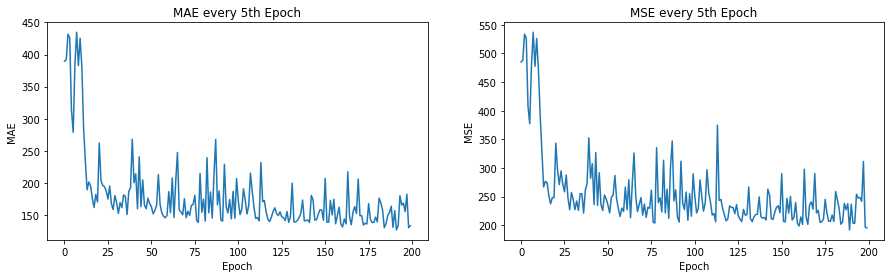

In [9]:
plot_MAE_MSE('MAE_Trial_6.csv', 'MSE_Trial_6.csv')

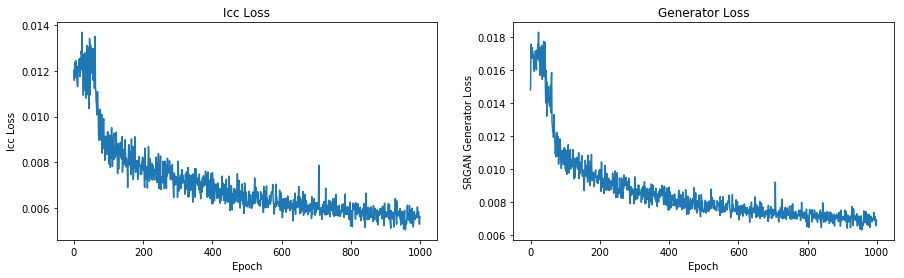

In [10]:
plot_loss('N_Loss_Trial_6.csv', 'G_Loss_Trial_6.csv')

### Training ICC Single branch and SRGAN pipeline for dense images

#### Training Data

High Density crops generated by sliding window

Window Size = h/3, w/3

Stride = window/3

Crop Density = Total Density / Image Area

Total training images = 5736/13606 (based on threshold of 0.001 on Crop Density)

#### Model Config

Epochs - 200
(Total number of epochs are less because there are 8 times more images in a single epoch than it used to be)

W = 0.01

Best Results

MAE_HR: 98.2, MSE_HR: 152.2, Epoch: 158.00

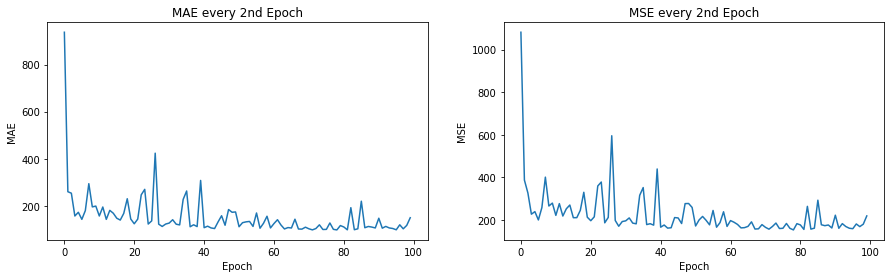

In [11]:
plot_MAE_MSE('MAE_Trial_7.csv', 'MSE_Trial_7.csv', title_mae = 'MAE every 2nd Epoch', title_mse = 'MSE every 2nd Epoch')

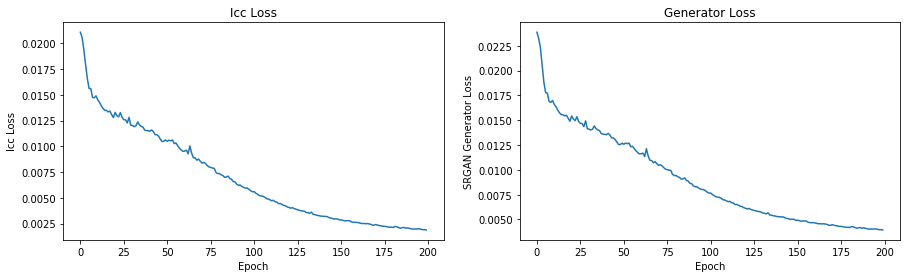

In [12]:
plot_loss('N_Loss_Trial_7.csv', 'G_Loss_Trial_7.csv')

#### Analysis of Trained model on dense and non-dense images in valdiation data

In [13]:
import pickle

with open('count_data_dense.pickle', 'rb') as f:
    count_data_dense = pickle.load(f, encoding='bytes')
    
with open('count_data_icc_simple.pickle', 'rb') as f:
    count_data_icc_simple = pickle.load(f, encoding='bytes')

In [14]:
threshold = 200

In [22]:
dense_avg = 0.0
avg = 0.0
count = 0
simple_avg = 0.0

for key, value in count_data_dense.items():
    if value[0] > threshold:
        dense_avg += value[1]
        avg += value[0]
        count += 1

for key, value in count_data_icc_simple.items():
    if value[0] > threshold:
        simple_avg += value[1]
        
avg = avg/count
dense_avg = dense_avg/count
simple_avg = simple_avg/count

In [23]:
print("Images with count > threshold: {} Avg: {} Dense Avg: {} Simple Avg: {}".format(count, avg, dense_avg, simple_avg))

Images with count > threshold: 139 Avg: 521.8885414617524 Dense Avg: 510.65587492469405 Simple Avg: 489.7979124329931


In [21]:
print("Images with count < threshold: {} Avg: {} Dense Avg: {} Simple Avg: {}".format(count, avg, dense_avg, simple_avg))

Images with count < threshold: 43 Avg: 144.18111419677734 Dense Avg: 197.4490053930948 Simple Avg: 156.7753344691077


#### Conclusion

After training only on Dense images model is able to identify dense images better. We can try balancing out dense and non-dense images and see the result.